In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
N = 100000
P = 0.01
NUM_ITER = 1
A = np.zeros((N,N))

In [ ]:
for v_i in range(N):
    for i in range(NUM_ITER):
        elements = np.arange(N)
        elements = np.delete(elements, v_i)
        v_j = np.random.choice(elements)
        if np.random.random() < P:
            A[v_i,v_j] = 1
            A[v_j,v_i] = 1
        else:
            
            candidates = np.argwhere(A[v_j,:] == 1)
            candidates = np.delete(candidates, np.argwhere(candidates == v_i))
            candidates = np.delete(candidates, np.argwhere(candidates == v_j))
            if len(candidates)==0:
                continue
            v_h = np.random.choice(candidates)
            A[v_i,v_h] = 1
            A[v_h,v_i] = 1


In [ ]:
degree = np.sum(A, axis=1)
min_deg = 1
max_deg = N
deg_dist = np.zeros(max_deg)
for i in range(min_deg, max_deg):
    deg_dist[i] = np.sum(degree == i)

x = np.log(np.arange(min_deg, max_deg))
y = np.log(deg_dist[min_deg:])
plt.scatter(x,y)




/var/folders/tx/5_6_zg1d0fd4zjwzxg1ztrth0000gn/T/ipykernel_6133/2223520759.py:13: RuntimeWarning: divide by zero encountered in log
  y = np.log(deg_dist[min_deg:])


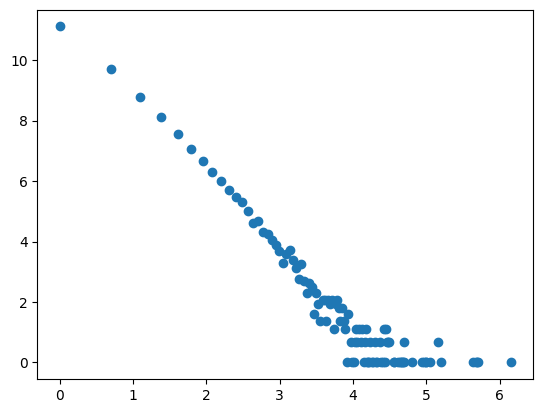

In [4]:
# generate a graph using preferential attachement model, use networkx
N=100_000
G = nx.barabasi_albert_graph(N, 1)
degree = np.array(list(dict(G.degree()).values()))
min_deg = 1
max_deg = N
# for each degree, count the number of nodes
deg_dist = np.zeros(max_deg)
for i in range(1, max_deg):
    deg_dist[i] = np.sum(degree == i)

x = np.log(np.arange(min_deg, max_deg))
y = np.log(deg_dist[min_deg:])
plt.scatter(x,y)
